<a href="https://colab.research.google.com/github/ChenghenChen/Slum/blob/main/030624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install segment-geospatial leafmap pillow


In [9]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


In [13]:
# 分割图像函数
def split_image(image_path, out_dir, grid_size=10):
    img = Image.open(image_path)
    img_width, img_height = img.size
    tile_width, tile_height = img_width // grid_size, img_height // grid_size

    # 创建输出目录
    os.makedirs(out_dir, exist_ok=True)

    for i in range(grid_size):
        for j in range(grid_size):
            box = (j * tile_width, i * tile_height, (j + 1) * tile_width, (i + 1) * tile_height)
            out_path = os.path.join(out_dir, f'tile_{i}_{j}.png')
            img.crop(box).save(out_path, 'PNG')


In [14]:
# 重组并显示图像函数
def reassemble_and_show(split_dir, grid_size=10, line_color=(255, 0, 0), line_width=2):
    first_image_path = os.path.join(split_dir, 'tile_0_0.png')
    first_img = Image.open(first_image_path)
    tile_width, tile_height = first_img.size

    full_width, full_height = tile_width * grid_size, tile_height * grid_size
    full_image = Image.new('RGB', (full_width, full_height))

    for i in range(grid_size):
        for j in range(grid_size):
            img_path = os.path.join(split_dir, f'tile_{i}_{j}.png')
            img = Image.open(img_path)
            full_image.paste(img, (j * tile_width, i * tile_height))

    draw = ImageDraw.Draw(full_image)
    for i in range(1, grid_size):
        draw.line([(0, i * tile_height), (full_width, i * tile_height)], fill=line_color, width=line_width)
        draw.line([(i * tile_width, 0), (i * tile_width, full_height)], fill=line_color, width=line_width)
    del draw

    plt.figure(figsize=(10, 10))
    plt.imshow(full_image)
    plt.axis('off')
    plt.show()


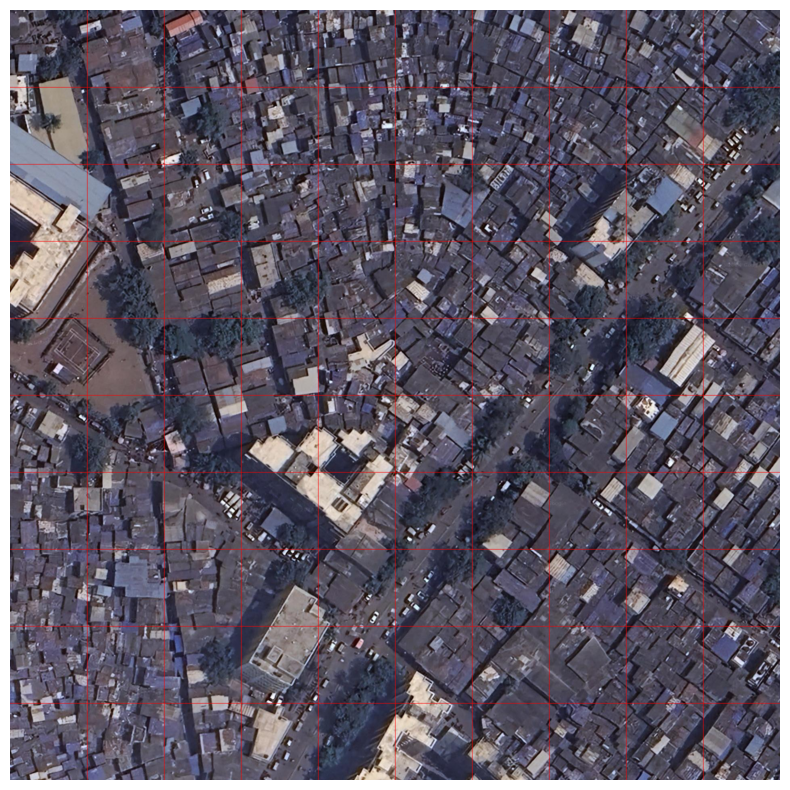

In [15]:
# 分割原始图像并重组展示
original_image_path = '/content/drive/MyDrive/Colab/Artboard 1 copy 3.png'  # 原始图像路径
split_images_dir = '/content/drive/MyDrive/Colab/SplitImages'  # 分割图像保存目录
split_image(original_image_path, split_images_dir)  # 分割图像
reassemble_and_show(split_images_dir)  # 重组并显示图像


In [2]:
from samgeo import SamGeo

# 初始化 SAMGEO 模型
sam = SamGeo(model_type="vit_h", checkpoint="sam_vit_h_4b8939.pth")

# 检查已经处理过的图像
processed_files = set()
processed_file_path = '/content/drive/My Drive/SplitImages/processed.txt'  # 处理过的图像列表
if os.path.exists(processed_file_path):
    with open(processed_file_path, 'r') as f:
        processed_files = set(f.read().splitlines())

# 处理每个小图像
for i in range(10):
    for j in range(10):
        tile_path = f'{split_images_dir}/tile_{i}_{j}.png'
        if tile_path in processed_files:
            continue  # 跳过已处理的图像

        # 分割并保存
        segmented_path = f'{split_images_dir}/segmented_tile_{i}_{j}.png'
        sam.generate(tile_path, segmented_path, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255)

        # 记录处理过的图像
        with open(processed_file_path, 'a') as f:
            f.write(f"{tile_path}\n")

        # 可选：展示第一张图的分割结果
        if i == 0 and j == 0:
            from PIL import Image
            import matplotlib.pyplot as plt

            # 显示第一张分割后的图像
            segmented_img = Image.open(segmented_path)
            plt.figure(figsize=(8, 8))
            plt.imshow(segmented_img)
            plt.title("Segmented Tile 0_0")
            plt.show()


ModuleNotFoundError: No module named 'samgeo'